# DATA IMPORTATION AND PROCESSING

In [1]:
#Importing data processing packages
import pandas as pd
import itertools

In [2]:
#Defining data path
dataset_path = r"C:\Users\Achor\Downloads\dataset.xlsx"

In [3]:
#Reading the dataset from Excel files
dataset = pd.read_excel(dataset_path, sheet_name = 'DATASET', keep_default_na=False)

In [4]:
#Inspecting data
dataset.head()

,doc_no,annotator,struggle,cluster_expert,cluster_expert_merged,cluster_auto,struggle_original,OT,reflection_candidates,reflection_annotation,...,reframing_annotation,reframing_from_expert,comfort_candidates,comfort_annotation,comfort_from_expert,suggestion_candidates,suggestion_annotation,suggestion_from_expert,reduced_embeddings,full_embeddings
0,1,1,When dieting I often find it hard to track my ...,CALORIE_COUNTING,DIET_PLAN_ISSUES,find_calorie_time,When dieting I often find it hard to track my ...,N,"So, do you mean that tracking your calorie int...",Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,It can happen to anyone to find it difficult t...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,"Starting from tomorrow, you could try tracking...",N ### Y ### Y ### N ### Y ### N ### Y ### Y ##...,N/A,-0.38553035 ### 9.694216 ### 8.311511,-0.04257814213633537 ### 0.045637574046850204 ...
1,2,1,Saying no to alcohol in social settings. I usu...,SOCIAL,SOCIAL,feel_alcohol_friend,Saying no to alcohol in social settings. I usu...,N,Do you mean that saying no to alcohol in socia...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,It's understandable to struggle with saying no...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,Starting from tomorrow you could try setting a...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,1.6147285 ### 12.11944 ### 6.081849,0.021132370457053185 ### -0.020406601950526237...
2,3,1,Healthy food is expensive and earning a middle...,SITUATIONAL,SITUATIONAL,feel_food_junk,Healthy food is expensive and earning a middle...,N,Do you mean that healthy food options are too ...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,It can happen to feel tempted to grab fast foo...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,"Starting from tomorrow, you could make a list ...",N ### Y ### Y ### Y ### N ### Y ### Y ### Y ##...,N/A,-0.74341005 ### 14.221862 ### 9.163124,-0.0352167934179306 ### 0.06300564110279083 ##...
3,4,1,Working out is hard for me because I'm used to...,MOTIVATION,MOTIVATION,feel_time_gym_day,Working out is hard for me because Im used to ...,N,"So, do you mean you have trouble creating a ne...",Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,It's understandable to find it difficult to ad...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,"It could be helpful to set small, achievable g...",Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,4.136178 ### 9.765074 ### 7.860414,0.022051161155104637 ### -0.0497511550784111 #...
4,5,1,When I see pizza I always want to buy and I en...,CRAVING_HABIT,CRAVING_HABIT,feel_food_junk,When I see pizza I always want to buy and I en...,N,"So, are you saying that you have a hard time r...",Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,Sometimes it can happen that we crave certain ...,Y ### Y ### Y ### Y ### Y ### N ### Y ### Y ##...,N/A,"Starting from tomorrow, you could make a plan ...",N ### Y ### Y ### N ### Y ### Y ### Y ### Y ##...,N/A,-1.5897965 ### 13.701472 ### 7.329277,-0.009577570483088493 ### 0.09480103105306625 ...


In [5]:
# splitting lists with ### separator and converting relevant columns to strings
for col in dataset.columns:
    if type(dataset[col][0]) == str:
        if dataset[col].str.contains(" ### ").any():
            new_col = dataset[col].str.split(" ### ")
            dataset[col] = new_col

In [6]:
#Inspecting dataset
dataset.head()

,doc_no,annotator,struggle,cluster_expert,cluster_expert_merged,cluster_auto,struggle_original,OT,reflection_candidates,reflection_annotation,...,reframing_annotation,reframing_from_expert,comfort_candidates,comfort_annotation,comfort_from_expert,suggestion_candidates,suggestion_annotation,suggestion_from_expert,reduced_embeddings,full_embeddings
0,1,1,When dieting I often find it hard to track my ...,CALORIE_COUNTING,DIET_PLAN_ISSUES,find_calorie_time,When dieting I often find it hard to track my ...,N,"[So, do you mean that tracking your calorie in...","[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],[It can happen to anyone to find it difficult ...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[Starting from tomorrow, you could try trackin...","[N, Y, Y, N, Y, N, Y, Y, Y, Y]",[N/A],"[-0.38553035, 9.694216, 8.311511]","[-0.04257814213633537, 0.045637574046850204, 0..."
1,2,1,Saying no to alcohol in social settings. I usu...,SOCIAL,SOCIAL,feel_alcohol_friend,Saying no to alcohol in social settings. I usu...,N,[Do you mean that saying no to alcohol in soci...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],[It's understandable to struggle with saying n...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],[Starting from tomorrow you could try setting ...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[1.6147285, 12.11944, 6.081849]","[0.021132370457053185, -0.020406601950526237, ..."
2,3,1,Healthy food is expensive and earning a middle...,SITUATIONAL,SITUATIONAL,feel_food_junk,Healthy food is expensive and earning a middle...,N,[Do you mean that healthy food options are too...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],[It can happen to feel tempted to grab fast fo...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[Starting from tomorrow, you could make a list...","[N, Y, Y, Y, N, Y, Y, Y, Y, Y]",[N/A],"[-0.74341005, 14.221862, 9.163124]","[-0.0352167934179306, 0.06300564110279083, 0.0..."
3,4,1,Working out is hard for me because I'm used to...,MOTIVATION,MOTIVATION,feel_time_gym_day,Working out is hard for me because Im used to ...,N,"[So, do you mean you have trouble creating a n...","[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],[It's understandable to find it difficult to a...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[It could be helpful to set small, achievable ...","[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[4.136178, 9.765074, 7.860414]","[0.022051161155104637, -0.0497511550784111, 0...."
4,5,1,When I see pizza I always want to buy and I en...,CRAVING_HABIT,CRAVING_HABIT,feel_food_junk,When I see pizza I always want to buy and I en...,N,"[So, are you saying that you have a hard time ...","[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],[Sometimes it can happen that we crave certain...,"[Y, Y, Y, Y, Y, N, Y, Y, Y, Y]",[N/A],"[Starting from tomorrow, you could make a plan...","[N, Y, Y, N, Y, Y, Y, Y, Y, Y]",[N/A],"[-1.5897965, 13.701472, 7.329277]","[-0.009577570483088493, 0.09480103105306625, 0..."


## DROP THE 'NOT_APPLICABLE' CLUSTERS

In [70]:
# Counting the number of rows where 'cluster_expert_merged' is 'NOT_APPLICABLE'
count_not_applicable = dataset[dataset['cluster_expert_merged'] == 'NOT_APPLICABLE'].shape[0]

# Using query to filter out 'NOT_APPLICABLE'
filtered_dataset = dataset.query("cluster_expert_merged != 'NOT_APPLICABLE'")
filtered_dataset.head()

# Calculating the number of rows dropped
rows_dropped = count_not_applicable

# Calculating the number of rows remaining
rows_remaining = filtered_dataset.shape[0]

# Outputing the counts
print("Number of rows dropped:", rows_dropped)
print("Number of rows remaining:", rows_remaining)



Number of rows dropped: 98
Number of rows remaining: 2322


# ESTABLISHING BASELINE BY CATEGORY

## REFLECTION CANDIDDATES

### LOADING STATEMENTS AND LABELS INTO LIST

In [8]:
# Reading the reflection candidates into a list with bespoke names
reflective_statements = []
reflective_labels = []
for index, row in filtered_dataset.iterrows():
    for statement, annotation in zip(row['reflection_candidates'], row['reflection_annotation']):
        reflective_statements.append(statement)
        reflective_labels.append(1 if annotation == 'Y' else 0)

In [9]:
reflective_df = pd.DataFrame({
    'Statement': reflective_statements,
    'Label': reflective_labels
})

# Converting numeric labels back to 'Y' and 'N' for clarity
reflective_df['Label'] = reflective_df['Label'].apply(lambda x: 'Y' if x == 1 else 'N')

# Counting the number of statements in each category
category_counts = reflective_df['Label'].value_counts()
print("Number of statements in each category:")
print(category_counts)

# Printing two samples for each category
print("\nTwo samples for each category:")

for label in reflective_df['Label'].unique():
    print(f"\nCategory {label} samples:")
    samples = reflective_df[reflective_df['Label'] == label].sample(n=2, random_state=1)
    for i, row in samples.iterrows():
        print(f"- {row['Statement']}")

Number of statements in each category:
Label
Y    20177
N     3043
Name: count, dtype: int64

Two samples for each category:

Category Y samples:
- Do you mean that it is difficult to afford the ingredients for healthy meals?
- So, do you mean that you find it challenging to control your intake of pastries high in chocolate during college breaks?

Category N samples:
-  Are you saying that the unhealthy food choices you make during stressful times are detrimental to your overall health?
- Are you saying that it's difficult for you to say no to social gatherings with your family and friends because they involve unhealthy food and alcohol?


### HANDLE DATA IMBALANCE

In [10]:
from imblearn.under_sampling import RandomUnderSampler

# Creating a DataFrame from your lists
data = pd.DataFrame({
    'Statement': reflective_statements,
    'Label': reflective_labels
})

# Displaying the initial distribution
print("Initial distribution of labels:")
print(data['Label'].value_counts())

# Setting up the Random UnderSampler
rus = RandomUnderSampler(random_state=42)

# Resampling the data
X_resampled, y_resampled = rus.fit_resample(data[['Statement']], data['Label'])

# Converting the resampled features back to a DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=['Statement'])
resampled_data['Label'] = y_resampled

# Displaying the new distribution of labels
print("New distribution of labels after undersampling:")
print(resampled_data['Label'].value_counts())

# Create a list as well
resampled_statements = resampled_data['Statement'].tolist()
resampled_labels = resampled_data['Label'].tolist()

Initial distribution of labels:
Label
1    20177
0     3043
Name: count, dtype: int64
New distribution of labels after undersampling:
Label
0    3043
1    3043
Name: count, dtype: int64


In [11]:
resampled_data.sample(10)

,Statement,Label
4514,"So, do you mean that the colder and wetter wea...",0
15771,Are you saying that the presence of other peop...,1
3456,Are you saying that you felt better about your...,0
18016,Do you mean that you are trying to change your...,0
8640,"So, do you mean you have trouble finding healt...",0
8161,"So, do you mean that you struggle with portion...",0
7776,"So, do you mean that you find it hard to maint...",1
19298,"So, are you saying that stress causes you to i...",1
1686,Are you saying that you feel guilty for spendi...,0
11596,Do you mean that you find it hard to resist th...,1


### TRAIN-TEST SPLIT (80/20)

In [12]:
from sklearn.model_selection import train_test_split

#using the resampled data
X = resampled_data['Statement']  # Feature: Statements
y = resampled_data['Label']  # Labels

# Splitting data into training and test sets with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=42,
    stratify=y  # Ensures class proportions are maintained
)

### VECTORIZATION OF THE DATASET

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TfidfVectorizer with English stop words
vectorizer = TfidfVectorizer(stop_words='english')

# Fitting and transforming the training data
X_train_tfidf = vectorizer.fit_transform(X_train)  
X_test_tfidf = vectorizer.transform(X_test)  # Test data is not fitted

### TRAINING AND EVALUATING THE MODELS

In [14]:
# Function for confusion matrix
def plot_confusion_matrix(cm, classifier_name, labels):
    fig, ax = plt.subplots(figsize=(3, 3))
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {classifier_name}')
    #fig.colorbar(cax)
    
    # Set tick positions
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

    # Annotate each cell with the numeric value
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='red' if cm[i,j] > cm.max()/2 else 'black')

    plt.show()

In [15]:
# Importing packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#### LOGISTIC REGRESSION

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       609
           1       0.58      0.60      0.59       609

    accuracy                           0.59      1218
   macro avg       0.59      0.59      0.59      1218
weighted avg       0.59      0.59      0.59      1218

Logistic Regression Confusion Matrix:


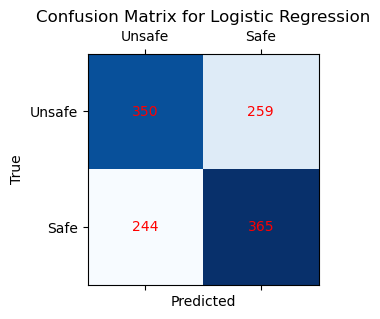

In [16]:
# Defining class labels
class_labels = ['Unsafe', 'Safe']

# Logistic Regression training
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_tfidf, y_train)
#LR Evaluation
lr_predictions = lr_classifier.predict(X_test_tfidf)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))
lr_cm = confusion_matrix(y_test, lr_predictions)
print("Logistic Regression Confusion Matrix:")
plot_confusion_matrix(lr_cm, 'Logistic Regression', class_labels)

#### NAIVE BAYES

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.59      0.59       609
           1       0.59      0.57      0.58       609

    accuracy                           0.58      1218
   macro avg       0.58      0.58      0.58      1218
weighted avg       0.58      0.58      0.58      1218

Naive Bayes Confusion Matrix:


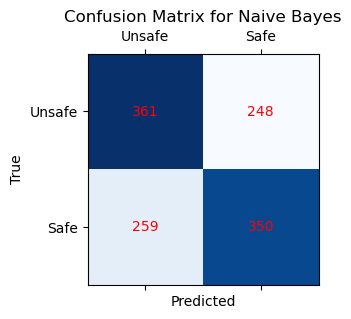

In [17]:
# Naive Bayes Training
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
# NB Evaluation
nb_predictions = nb_classifier.predict(X_test_tfidf)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))
nb_cm = confusion_matrix(y_test, nb_predictions)
print("Naive Bayes Confusion Matrix:")
plot_confusion_matrix(nb_cm, 'Naive Bayes', class_labels)

#### SUPPORT VECTOR MACHINE

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       609
           1       0.59      0.59      0.59       609

    accuracy                           0.59      1218
   macro avg       0.59      0.59      0.59      1218
weighted avg       0.59      0.59      0.59      1218

Support Vector Machine Confusion Matrix:
[[359 250]
 [248 361]]


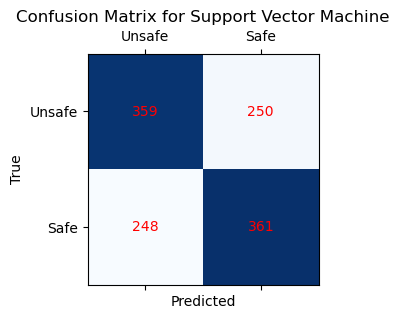

In [18]:
# Support Vector Machine Training
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)
#SVM Evaluation
svm_predictions = svm_classifier.predict(X_test_tfidf)
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svm_predictions))
svm_cm = confusion_matrix(y_test, svm_predictions)
print("Support Vector Machine Confusion Matrix:")
print(svm_cm)
plot_confusion_matrix(svm_cm, 'Support Vector Machine', class_labels)

## REFRAMING CANDIDATES

In [19]:
# Reading the reframing candidates into a list with bespoke names
reframing_statements = []
reframing_labels = []
for index, row in filtered_dataset.iterrows():
    for statement, annotation in zip(row['reframing_candidates'], row['reframing_annotation']):
        reframing_statements.append(statement)
        reframing_labels.append(1 if annotation == 'Y' else 0)

In [20]:
reframing_df = pd.DataFrame({
    'Statement': reframing_statements,
    'Label': reframing_labels
})

# Converting numeric labels back to 'Y' and 'N' for clarity
reframing_df['Label'] = reframing_df['Label'].apply(lambda x: 'Y' if x == 1 else 'N')

# Counting the number of statements in each category
category_counts = reframing_df['Label'].value_counts()
print("Number of statements in each category for Reframing Candidates:")
print(category_counts)

# Printing two samples for each category
print("\nTwo samples for each category in Reframing Candidates:")

for label in reframing_df['Label'].unique():
    print(f"\nCategory {label} samples:")
    samples = reframing_df[reframing_df['Label'] == label].sample(n=2, random_state=1)
    for i, row in samples.iterrows():
        print(f"- {row['Statement']}")


Number of statements in each category for Reframing Candidates:
Label
Y    19527
N     3693
Name: count, dtype: int64

Two samples for each category in Reframing Candidates:

Category Y samples:
- A more positive way to think about this could be that you can use this as an opportunity to learn more about nutrition and how to make healthy food choices.
- How about seeing it this way for a minute: Every time you resist the temptation to eat junk food, you are building your willpower and self-discipline.

Category N samples:
- A more positive way to think about this could be: Instead of viewing it as a setback, you're taking time to listen to your body and what it needs.
- A more positive way to think about this could be that investing in healthy food now can lead to long-term health benefits and savings on medical expenses.


### HANDLING DATA IMBALANCE

In [21]:
# Creating a DataFrame from your reframing lists
reframing_data = pd.DataFrame({
    'Statement': reframing_statements,
    'Label': reframing_labels
})

# Displaying the initial distribution of labels
print("Initial distribution of labels:")
print(reframing_data['Label'].value_counts())

# Setting up the Random UnderSampler
rus = RandomUnderSampler(random_state=42)

# Resampling the data
X_resampled_reframing, y_resampled_reframing = rus.fit_resample(reframing_data[['Statement']], reframing_data['Label'])

# Converting the resampled features back to a DataFrame
resampled_reframing_data = pd.DataFrame(X_resampled_reframing, columns=['Statement'])
resampled_reframing_data['Label'] = y_resampled_reframing

# Displaying the new distribution of labels
print("New distribution of labels after undersampling:")
print(resampled_reframing_data['Label'].value_counts())

# Create lists as well for potential further usage
resampled_reframing_statements = resampled_reframing_data['Statement'].tolist()
resampled_reframing_labels = resampled_reframing_data['Label'].tolist()

Initial distribution of labels:
Label
1    19527
0     3693
Name: count, dtype: int64
New distribution of labels after undersampling:
Label
0    3693
1    3693
Name: count, dtype: int64


### TRAIN-TEST SPLIT (80/20)

In [22]:
# Using the resampled reframing data
X_reframing = resampled_reframing_data['Statement']  # Feature: Statements from reframing candidates
y_reframing = resampled_reframing_data['Label']  # Labels from reframing candidates

# Splitting data into training and test sets with stratification to ensure class balance
X_train_reframing, X_test_reframing, y_train_reframing, y_test_reframing = train_test_split(
    X_reframing, y_reframing,
    test_size=0.20,
    random_state=42,
    stratify=y_reframing  # Ensures each class is equally represented in train and test sets
)

### VECTORIZATION OF DATASET

In [23]:
# Initializing the TfidfVectorizer with English stop words for the reframing data
vectorizer_reframing = TfidfVectorizer(stop_words='english')

# Fitting and transforming the training data from the reframing dataset
X_train_tfidf_reframing = vectorizer_reframing.fit_transform(X_train_reframing)
X_test_tfidf_reframing = vectorizer_reframing.transform(X_test_reframing)  # Only transforming the test data

### TRAINING AND EVALUATING THE MODELS

#### LOGISTIC REGRESSION

Logistic Regression Classification Report for Reframing Data:
              precision    recall  f1-score   support

           0       0.58      0.59      0.59       739
           1       0.58      0.57      0.57       739

    accuracy                           0.58      1478
   macro avg       0.58      0.58      0.58      1478
weighted avg       0.58      0.58      0.58      1478

Logistic Regression Confusion Matrix for Reframing Data:


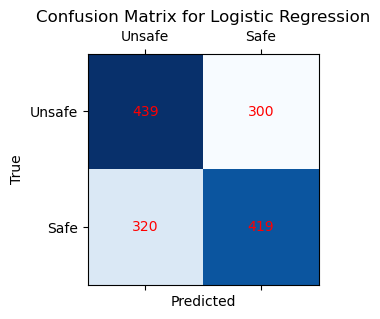

In [24]:
# Defining class labels
class_labels = ['Unsafe', 'Safe']

# Logistic Regression training for Reframing Data
lr_classifier_reframing = LogisticRegression(random_state=42)
lr_classifier_reframing.fit(X_train_tfidf_reframing, y_train_reframing)

# LR Evaluation for Reframing Data
lr_predictions_reframing = lr_classifier_reframing.predict(X_test_tfidf_reframing)
print("Logistic Regression Classification Report for Reframing Data:")
print(classification_report(y_test_reframing, lr_predictions_reframing))

# Confusion Matrix for Reframing Data
lr_cm_reframing = confusion_matrix(y_test_reframing, lr_predictions_reframing)
print("Logistic Regression Confusion Matrix for Reframing Data:")
plot_confusion_matrix(lr_cm_reframing, 'Logistic Regression', class_labels)

#### NAIVE BAYES

Naive Bayes Classification Report for Reframing Data:
              precision    recall  f1-score   support

           0       0.57      0.61      0.59       739
           1       0.58      0.54      0.56       739

    accuracy                           0.57      1478
   macro avg       0.57      0.57      0.57      1478
weighted avg       0.57      0.57      0.57      1478

Naive Bayes Confusion Matrix for Reframing Data:


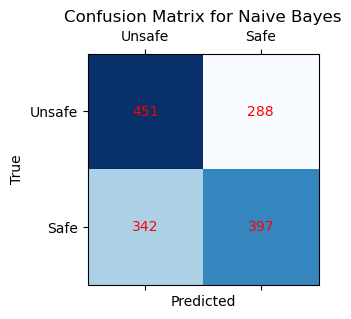

In [25]:
# Naive Bayes Training for Reframing Data
nb_classifier_reframing = MultinomialNB()
nb_classifier_reframing.fit(X_train_tfidf_reframing, y_train_reframing)

# NB Evaluation for Reframing Data
nb_predictions_reframing = nb_classifier_reframing.predict(X_test_tfidf_reframing)
print("Naive Bayes Classification Report for Reframing Data:")
print(classification_report(y_test_reframing, nb_predictions_reframing))

# Confusion Matrix for Reframing Data
nb_cm_reframing = confusion_matrix(y_test_reframing, nb_predictions_reframing)
print("Naive Bayes Confusion Matrix for Reframing Data:")
plot_confusion_matrix(nb_cm_reframing, 'Naive Bayes', class_labels)

#### SUPPORT VECTOR MACHINE

Support Vector Machine Classification Report for Reframing Data:
              precision    recall  f1-score   support

           0       0.58      0.61      0.60       739
           1       0.59      0.55      0.57       739

    accuracy                           0.58      1478
   macro avg       0.58      0.58      0.58      1478
weighted avg       0.58      0.58      0.58      1478

Support Vector Machine Confusion Matrix for Reframing Data:


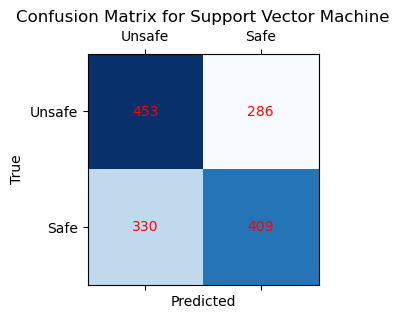

In [26]:
# Support Vector Machine Training for Reframing Data
svm_classifier_reframing = SVC(kernel='linear', random_state=42)
svm_classifier_reframing.fit(X_train_tfidf_reframing, y_train_reframing)

# SVM Evaluation for Reframing Data
svm_predictions_reframing = svm_classifier_reframing.predict(X_test_tfidf_reframing)
print("Support Vector Machine Classification Report for Reframing Data:")
print(classification_report(y_test_reframing, svm_predictions_reframing))

# Confusion Matrix for Reframing Data
svm_cm_reframing = confusion_matrix(y_test_reframing, svm_predictions_reframing)
print("Support Vector Machine Confusion Matrix for Reframing Data:")
plot_confusion_matrix(svm_cm_reframing, 'Support Vector Machine', class_labels)

## COMFORT CANDIDATES

In [27]:
# Reading the comfort candidates into a list with bespoke names
comfort_statements = []
comfort_labels = []
for index, row in filtered_dataset.iterrows():
    for statement, annotation in zip(row['comfort_candidates'], row['comfort_annotation']):
        comfort_statements.append(statement)
        comfort_labels.append(1 if annotation == 'Y' else 0)

In [28]:
comfort_df = pd.DataFrame({
    'Statement': comfort_statements,
    'Label': comfort_labels
})

# Converting numeric labels back to 'Y' and 'N' for clarity
comfort_df['Label'] = comfort_df['Label'].apply(lambda x: 'Y' if x == 1 else 'N')

# Counting the number of statements in each category
category_counts = comfort_df['Label'].value_counts()
print("Number of statements in each category for Comfort Candidates:")
print(category_counts)

# Printing two samples for each category
print("\nTwo samples for each category in Comfort Candidates:")

for label in comfort_df['Label'].unique():
    print(f"\nCategory {label} samples:")
    samples = comfort_df[comfort_df['Label'] == label].sample(n=2, random_state=1)
    for i, row in samples.iterrows():
        print(f"- {row['Statement']}")


Number of statements in each category for Comfort Candidates:
Label
Y    19169
N     4051
Name: count, dtype: int64

Two samples for each category in Comfort Candidates:

Category Y samples:
- Sometimes it can happen that you fall off track with your diet, but it's important to remember that it's not the end of the road. 
- Sometimes it can happen that making changes to your diet can be difficult. 

Category N samples:
- It's understandable to feel like sweets are a comfort food for you, but it's important to find healthy ways to cope with emotional needs. 
- It can happen to anyone, it's a normal part of the process. 


### HANDLING DATA IMBALANCE

In [29]:
# Creating a DataFrame from the lists
comfort_data = pd.DataFrame({
    'Statement': comfort_statements,
    'Label': comfort_labels
})

# Displaying the initial distribution of labels
print("Initial distribution of comfort labels:")
print(comfort_data['Label'].value_counts())
# Setting up the Random UnderSampler
rus = RandomUnderSampler(random_state=42)

# Resampling the comfort data
X_resampled_comfort, y_resampled_comfort = rus.fit_resample(comfort_data[['Statement']], comfort_data['Label'])

# Converting the resampled features back to a DataFrame
resampled_comfort_data = pd.DataFrame(X_resampled_comfort, columns=['Statement'])
resampled_comfort_data['Label'] = y_resampled_comfort

# Displaying the new distribution of labels
print("New distribution of comfort labels after undersampling:")
print(resampled_comfort_data['Label'].value_counts())

Initial distribution of comfort labels:
Label
1    19169
0     4051
Name: count, dtype: int64
New distribution of comfort labels after undersampling:
Label
0    4051
1    4051
Name: count, dtype: int64


### TRAIN/TEST SPLIT (80/20)

In [30]:
# Splitting data into training and test sets with stratification
X_train_comfort, X_test_comfort, y_train_comfort, y_test_comfort = train_test_split(
    resampled_comfort_data['Statement'], 
    resampled_comfort_data['Label'], 
    test_size=0.20, 
    random_state=42,
    stratify=resampled_comfort_data['Label']  # Ensures the class distribution is maintained
)

### VECTORIZING THE DATASET

In [31]:
# Initializing the TfidfVectorizer with English stop words for the comfort data
vectorizer_comfort = TfidfVectorizer(stop_words='english')
X_train_tfidf_comfort = vectorizer_comfort.fit_transform(X_train_comfort)
X_test_tfidf_comfort = vectorizer_comfort.transform(X_test_comfort)

### TRAINING AND EVALUATING THE MODELS

#### LOGISTIC REGRESSION

Logistic Regression Classification Report for Comfort Data:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       811
           1       0.57      0.56      0.57       810

    accuracy                           0.57      1621
   macro avg       0.57      0.57      0.57      1621
weighted avg       0.57      0.57      0.57      1621



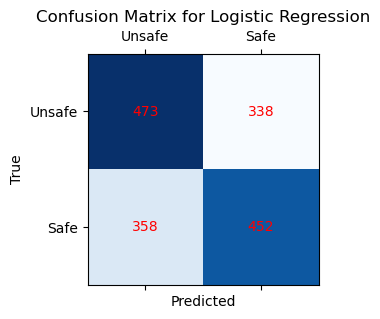

In [32]:
# Define class labels
class_labels = ['Unsafe', 'Safe']

# Logistic Regression Taining
lr_classifier_comfort = LogisticRegression(random_state=42)
lr_classifier_comfort.fit(X_train_tfidf_comfort, y_train_comfort)
#LR Evaluation
lr_predictions_comfort = lr_classifier_comfort.predict(X_test_tfidf_comfort)
print("Logistic Regression Classification Report for Comfort Data:")
print(classification_report(y_test_comfort, lr_predictions_comfort))
lr_cm_comfort = confusion_matrix(y_test_comfort, lr_predictions_comfort)
plot_confusion_matrix(lr_cm_comfort, 'Logistic Regression', class_labels)

#### NAIVE BAYES

Naive Bayes Classification Report for Comfort Data:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59       811
           1       0.58      0.53      0.55       810

    accuracy                           0.57      1621
   macro avg       0.57      0.57      0.57      1621
weighted avg       0.57      0.57      0.57      1621

Naive Bayes Confusion Matrix for Comfort Data:


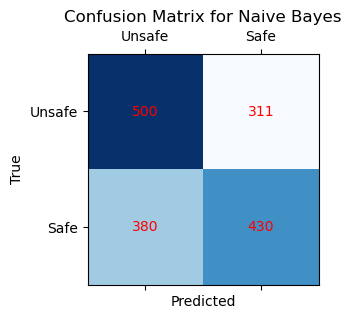

In [33]:
# Naive Bayes Training for Comfort Data
nb_classifier_comfort = MultinomialNB()
nb_classifier_comfort.fit(X_train_tfidf_comfort, y_train_comfort)

# NB Evaluation for Comfort Data
nb_predictions_comfort = nb_classifier_comfort.predict(X_test_tfidf_comfort)
print("Naive Bayes Classification Report for Comfort Data:")
print(classification_report(y_test_comfort, nb_predictions_comfort))

# Confusion Matrix for Comfort Data
nb_cm_comfort = confusion_matrix(y_test_comfort, nb_predictions_comfort)
print("Naive Bayes Confusion Matrix for Comfort Data:")
plot_confusion_matrix(nb_cm_comfort, 'Naive Bayes', class_labels)

#### SUPPORT VECTOR MACHINE

Support Vector Machine Classification Report for Comfort Data:
              precision    recall  f1-score   support

           0       0.56      0.60      0.58       811
           1       0.57      0.53      0.55       810

    accuracy                           0.56      1621
   macro avg       0.56      0.56      0.56      1621
weighted avg       0.56      0.56      0.56      1621

Support Vector Machine Confusion Matrix for Comfort Data:


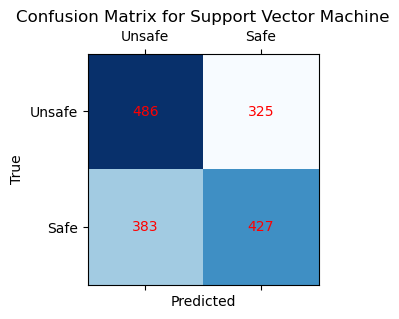

In [34]:
# Support Vector Machine Training for Comfort Data
svm_classifier_comfort = SVC(kernel='linear', random_state=42)
svm_classifier_comfort.fit(X_train_tfidf_comfort, y_train_comfort)

# SVM Evaluation for Comfort Data
svm_predictions_comfort = svm_classifier_comfort.predict(X_test_tfidf_comfort)
print("Support Vector Machine Classification Report for Comfort Data:")
print(classification_report(y_test_comfort, svm_predictions_comfort))

# Confusion Matrix for Comfort Data
svm_cm_comfort = confusion_matrix(y_test_comfort, svm_predictions_comfort)
print("Support Vector Machine Confusion Matrix for Comfort Data:")
plot_confusion_matrix(svm_cm_comfort, 'Support Vector Machine', class_labels)

## SUGGESTION CANDIDATES

In [35]:
# Reading the suggestion candidates into a list with bespoke names
suggestion_statements = []
suggestion_labels = []
for index, row in filtered_dataset.iterrows():
    for statement, annotation in zip(row['suggestion_candidates'], row['suggestion_annotation']):
        suggestion_statements.append(statement)
        suggestion_labels.append(1 if annotation == 'Y' else 0)

In [36]:
suggestion_df = pd.DataFrame({
    'Statement': suggestion_statements,
    'Label': suggestion_labels
})

# Converting numeric labels back to 'Y' and 'N' for clarity
suggestion_df['Label'] = suggestion_df['Label'].apply(lambda x: 'Y' if x == 1 else 'N')

# Counting the number of statements in each category
category_counts = suggestion_df['Label'].value_counts()
print("Number of statements in each category for Suggestion Candidates:")
print(category_counts)

# Printing two samples for each category
print("\nTwo samples for each category in Suggestion Candidates:")

for label in suggestion_df['Label'].unique():
    print(f"\nCategory {label} samples:")
    samples = suggestion_df[suggestion_df['Label'] == label].sample(n=2, random_state=1)
    for i, row in samples.iterrows():
        print(f"- {row['Statement']}")

Number of statements in each category for Suggestion Candidates:
Label
Y    19946
N     3274
Name: count, dtype: int64

Two samples for each category in Suggestion Candidates:

Category N samples:
- Starting from tomorrow, you could find healthy alternatives to binge eating, such as going for a walk or calling a friend when you feel the urge to overeat.
- You could try finding a workout routine that you enjoy, such as a dance class or swimming, instead of focusing on traditional gym equipment.

Category Y samples:
- It could be helpful to set realistic workout goals for yourself, taking into account your work schedule and energy levels.
- It could be helpful to remember that it is normal to have a certain level of attachment to certain foods, especially those that have been a part of your family's food traditions.


### HANDLING DATA IMBALANCE

In [37]:
# Creating a DataFrame from the lists
suggestion_data = pd.DataFrame({
    'Statement': suggestion_statements,
    'Label': suggestion_labels
})

# Displaying the initial distribution of labels
print("Initial distribution of suggestion labels:")
print(suggestion_data['Label'].value_counts())
# Setting up the Random UnderSampler
rus = RandomUnderSampler(random_state=42)

# Resampling the suggestion data
X_resampled_suggestion, y_resampled_suggestion = rus.fit_resample(suggestion_data[['Statement']], suggestion_data['Label'])

# Converting the resampled features back to a DataFrame
resampled_suggestion_data = pd.DataFrame(X_resampled_suggestion, columns=['Statement'])
resampled_suggestion_data['Label'] = y_resampled_suggestion

# Displaying the new distribution of labels
print("New distribution of suggestion labels after undersampling:")
print(resampled_suggestion_data['Label'].value_counts())

Initial distribution of suggestion labels:
Label
1    19946
0     3274
Name: count, dtype: int64
New distribution of suggestion labels after undersampling:
Label
0    3274
1    3274
Name: count, dtype: int64


### TRAIN/TEST SPLIT (80/20)

In [38]:
# Splitting data into training and test sets with stratification
X_train_suggestion, X_test_suggestion, y_train_suggestion, y_test_suggestion = train_test_split(
    resampled_suggestion_data['Statement'], 
    resampled_suggestion_data['Label'], 
    test_size=0.20, 
    random_state=42,
    stratify=resampled_suggestion_data['Label']  # Ensures the class distribution is maintained
)

### VECTORIZING THE DATA

In [39]:
# Initializing the TfidfVectorizer with English stop words for the suggestion data
vectorizer_suggestion = TfidfVectorizer(stop_words='english')
X_train_tfidf_suggestion = vectorizer_suggestion.fit_transform(X_train_suggestion)
X_test_tfidf_suggestion = vectorizer_suggestion.transform(X_test_suggestion)

### TRAINING AND EVALUATING THE MODELS

#### LOGISTIC REGRESSION

Logistic Regression Classification Report for Suggestion Data:
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       655
           1       0.55      0.58      0.56       655

    accuracy                           0.55      1310
   macro avg       0.55      0.55      0.55      1310
weighted avg       0.55      0.55      0.55      1310



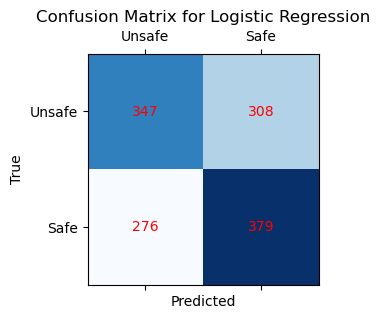

In [40]:
# Define class labels
class_labels = ['Unsafe', 'Safe']

# Logistic Regression Training
lr_classifier_suggestion = LogisticRegression(random_state=42)
lr_classifier_suggestion.fit(X_train_tfidf_suggestion, y_train_suggestion)
#LR Evaluation
lr_predictions_suggestion = lr_classifier_suggestion.predict(X_test_tfidf_suggestion)
print("Logistic Regression Classification Report for Suggestion Data:")
print(classification_report(y_test_suggestion, lr_predictions_suggestion))
lr_cm_suggestion = confusion_matrix(y_test_suggestion, lr_predictions_suggestion)
plot_confusion_matrix(lr_cm_suggestion, 'Logistic Regression', class_labels)

#### NAIVE BAYES

Naive Bayes Classification Report for Suggestion Data:
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       655
           1       0.56      0.52      0.54       655

    accuracy                           0.55      1310
   macro avg       0.55      0.55      0.55      1310
weighted avg       0.55      0.55      0.55      1310



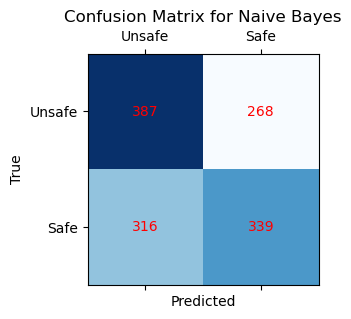

In [41]:
# Naive Bayes Training
nb_classifier_suggestion = MultinomialNB()
nb_classifier_suggestion.fit(X_train_tfidf_suggestion, y_train_suggestion)
# NB Evaluation
nb_predictions_suggestion = nb_classifier_suggestion.predict(X_test_tfidf_suggestion)
print("Naive Bayes Classification Report for Suggestion Data:")
print(classification_report(y_test_suggestion, nb_predictions_suggestion))
nb_cm_suggestion = confusion_matrix(y_test_suggestion, nb_predictions_suggestion)
plot_confusion_matrix(nb_cm_suggestion, 'Naive Bayes', class_labels)

#### SUPPORT VECTOR MACHINE

Support Vector Machine Classification Report for Suggestion Data:
              precision    recall  f1-score   support

           0       0.55      0.54      0.55       655
           1       0.55      0.56      0.56       655

    accuracy                           0.55      1310
   macro avg       0.55      0.55      0.55      1310
weighted avg       0.55      0.55      0.55      1310



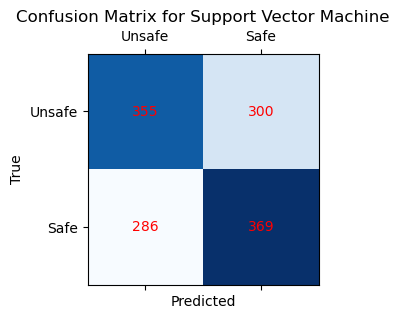

In [42]:
# SVM Training
svm_classifier_suggestion = SVC(kernel='linear', random_state=42)
svm_classifier_suggestion.fit(X_train_tfidf_suggestion, y_train_suggestion)
#SVM Evaluation
svm_predictions_suggestion = svm_classifier_suggestion.predict(X_test_tfidf_suggestion)
print("Support Vector Machine Classification Report for Suggestion Data:")
print(classification_report(y_test_suggestion, svm_predictions_suggestion))
svm_cm_suggestion = confusion_matrix(y_test_suggestion, svm_predictions_suggestion)
plot_confusion_matrix(svm_cm_suggestion, 'Support Vector Machine', class_labels)

## CRAVING HABIT CLUSTER

In [43]:
# Initialize lists to store statements and their labels
all_statements_craving = []
all_labels_craving = []

# Iterating through each row of the dataset
for index, row in filtered_dataset.iterrows():
    # Checking if the cluster_macro_expert category for the row is CRAVING_HABIT
    if row['cluster_expert_merged'] == 'CRAVING_HABIT':
       #passing statements
        for candidates_key, annotation_key in [('reflection_candidates', 'reflection_annotation'), 
                                               ('reframing_candidates', 'reframing_annotation'),
                                               ('comfort_candidates', 'comfort_annotation'),
                                                ('suggestion_candidates', 'suggestion_annotation')]:
            # Adjusting if your data structure
            for statement, annotation in zip(row[candidates_key], row[annotation_key]):
                all_statements_craving.append(statement)
                all_labels_craving.append(1 if annotation == 'Y' else 0)

In [44]:
# Creating a DataFrame from all collected statements and their labels
all_statements_craving_df = pd.DataFrame({
    'Statement': all_statements_craving,
    'Label': all_labels_craving
})

# Converting numeric labels back to 'Y' and 'N' for clarity
all_statements_craving_df['Label'] = all_statements_craving_df['Label'].apply(lambda x: 'Y' if x == 1 else 'N')

# Counting the number of statements in each category
category_counts = all_statements_craving_df['Label'].value_counts()
print("Number of statements in each category:")
print(category_counts)

# Printing two samples for each category
print("\nTwo samples for each category:")

for label in all_statements_craving_df['Label'].unique():
    print(f"\nCategory {label} samples:")
    samples = all_statements_craving_df[all_statements_craving_df['Label'] == label].sample(n=2, random_state=1)
    for i, row in samples.iterrows():
        print(f"- {row['Statement']}")

Number of statements in each category:
Label
Y    14334
N     2826
Name: count, dtype: int64

Two samples for each category:

Category Y samples:
- You could try finding a support system, whether it be a friend or a professional, to help hold you accountable for your eating habits.
- Starting from tomorrow, you could make a conscious effort to choose healthier options when eating out or ordering takeout. Look for dishes that are grilled, baked, or steamed rather than fried.

Category N samples:
- Maybe you could try tracking your progress and rewarding yourself for staying away from sugary food.
- So, do you mean that sticking to a daily routine makes it harder to maintain healthy eating habits?


### HANDLING DATA IMBALANCE

In [45]:
# Creating a DataFrame from the lists
craving_data = pd.DataFrame({
    'Statement': all_statements_craving,
    'Label': all_labels_craving
})

# Displaying the initial distribution of labels
print("Initial distribution of craving labels:")
print(craving_data['Label'].value_counts())
# Setting up the Random UnderSampler
rus = RandomUnderSampler(random_state=42)

# Resampling the craving data
X_resampled_craving, y_resampled_craving = rus.fit_resample(craving_data[['Statement']], craving_data['Label'])

# Converting the resampled features back to a DataFrame
resampled_craving_data = pd.DataFrame(X_resampled_craving, columns=['Statement'])
resampled_craving_data['Label'] = y_resampled_craving

# Displaying the new distribution of labels
print("New distribution of craving labels after undersampling:")
print(resampled_craving_data['Label'].value_counts())

Initial distribution of craving labels:
Label
1    14334
0     2826
Name: count, dtype: int64
New distribution of craving labels after undersampling:
Label
0    2826
1    2826
Name: count, dtype: int64


### TRAIN/TEST SPLIT (80/20)

In [46]:
# Splitting data into training and test sets with stratification
X_train_craving, X_test_craving, y_train_craving, y_test_craving = train_test_split(
    resampled_craving_data['Statement'], 
    resampled_craving_data['Label'], 
    test_size=0.20, 
    random_state=42,
    stratify=resampled_craving_data['Label']  # Maintains class distribution
)

### VECTORIZING THE DATA

In [47]:
# Initializing the TfidfVectorizer with English stop words for the craving data
vectorizer_craving = TfidfVectorizer(stop_words='english')
X_train_tfidf_craving = vectorizer_craving.fit_transform(X_train_craving)
X_test_tfidf_craving = vectorizer_craving.transform(X_test_craving)

### TRAINING AND EVALUATING THE MODELS

#### LOGISTIC REGRESSION

Logistic Regression Classification Report for Craving Data:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       566
           1       0.56      0.58      0.57       565

    accuracy                           0.57      1131
   macro avg       0.57      0.57      0.57      1131
weighted avg       0.57      0.57      0.57      1131



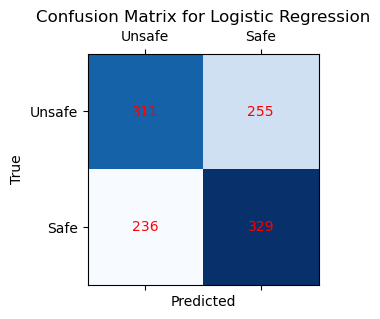

In [48]:
# Define class labels
class_labels = ['Unsafe', 'Safe']

# LR Training
lr_classifier_craving = LogisticRegression(random_state=42)
lr_classifier_craving.fit(X_train_tfidf_craving, y_train_craving)
# Evaluating LR
lr_predictions_craving = lr_classifier_craving.predict(X_test_tfidf_craving)
print("Logistic Regression Classification Report for Craving Data:")
print(classification_report(y_test_craving, lr_predictions_craving))
lr_cm_craving = confusion_matrix(y_test_craving, lr_predictions_craving)
plot_confusion_matrix(lr_cm_craving, 'Logistic Regression', class_labels)

#### NAIVE BAYES

Naive Bayes Classification Report for Craving Data:
              precision    recall  f1-score   support

           0       0.57      0.59      0.58       566
           1       0.57      0.56      0.57       565

    accuracy                           0.57      1131
   macro avg       0.57      0.57      0.57      1131
weighted avg       0.57      0.57      0.57      1131

Naive Bayes Confusion Matrix for Craving Data:


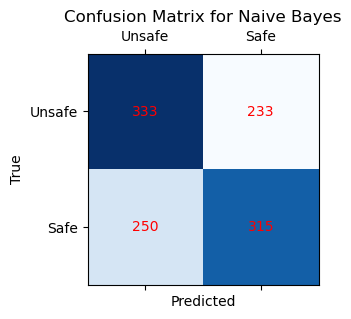

In [69]:
# Naive Bayes Training for Craving Data
nb_classifier_craving = MultinomialNB()
nb_classifier_craving.fit(X_train_tfidf_craving, y_train_craving)

# NB Evaluation for Craving Data
nb_predictions_craving = nb_classifier_craving.predict(X_test_tfidf_craving)
print("Naive Bayes Classification Report for Craving Data:")
print(classification_report(y_test_craving, nb_predictions_craving))

# Confusion Matrix for Craving Data
nb_cm_craving = confusion_matrix(y_test_craving, nb_predictions_craving)
print("Naive Bayes Confusion Matrix for Craving Data:")
plot_confusion_matrix(nb_cm_craving, 'Naive Bayes', class_labels)

#### SUPPORT VECTOR MACHINE

Support Vector Machine Classification Report for Craving Data:
              precision    recall  f1-score   support

           0       0.56      0.53      0.55       566
           1       0.55      0.58      0.57       565

    accuracy                           0.56      1131
   macro avg       0.56      0.56      0.56      1131
weighted avg       0.56      0.56      0.56      1131

Support Vector Machine Confusion Matrix for Craving Data:


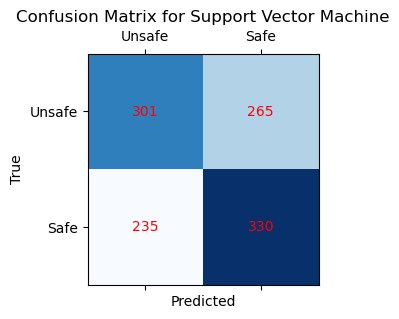

In [50]:
# Support Vector Machine Training for Craving Data
svm_classifier_craving = SVC(kernel='linear', random_state=42)
svm_classifier_craving.fit(X_train_tfidf_craving, y_train_craving)

# SVM Evaluation for Craving Data
svm_predictions_craving = svm_classifier_craving.predict(X_test_tfidf_craving)
print("Support Vector Machine Classification Report for Craving Data:")
print(classification_report(y_test_craving, svm_predictions_craving))

# Confusion Matrix for Craving Data
svm_cm_craving = confusion_matrix(y_test_craving, svm_predictions_craving)
print("Support Vector Machine Confusion Matrix for Craving Data:")
plot_confusion_matrix(svm_cm_craving, 'Support Vector Machine', class_labels)

## ENERGY EFFORT CONVENIENCE CLUSTER

In [51]:
# Initializing lists to store statements and their labels
all_statements_energy = []
all_labels_energy = []

# Iterating through each row of the dataset
for index, row in filtered_dataset.iterrows():
    # Checking if the cluster_macro_expert category for the row is CRAVING_HABIT
    if row['cluster_expert_merged'] == 'ENERGY_EFFORT_CONVENIENCE':
       #passing statements
        for candidates_key, annotation_key in [('reflection_candidates', 'reflection_annotation'), 
                                               ('reframing_candidates', 'reframing_annotation'),
                                               ('comfort_candidates', 'comfort_annotation'),
                                                ('suggestion_candidates', 'suggestion_annotation')]:
            # Adjusting data structure
            for statement, annotation in zip(row[candidates_key], row[annotation_key]):
                all_statements_energy.append(statement)
                all_labels_energy.append(1 if annotation == 'Y' else 0)

In [52]:
# Creating a DataFrame from all collected statements and their labels
all_statements_energy_df = pd.DataFrame({
    'Statement': all_statements_energy,
    'Label': all_labels_energy
})

# Converting numeric labels back to 'Y' and 'N' for clarity
all_statements_energy_df['Label'] = all_statements_energy_df['Label'].apply(lambda x: 'Y' if x == 1 else 'N')

# Counting the number of statements in each category
category_counts = all_statements_energy_df['Label'].value_counts()
print("Number of statements in each category:")
print(category_counts)

# Printing two samples for each category
print("\nTwo samples for each category:")

for label in all_statements_energy_df['Label'].unique():
    print(f"\nCategory {label} samples:")
    samples = all_statements_energy_df[all_statements_energy_df['Label'] == label].sample(n=2, random_state=1)
    for i, row in samples.iterrows():
        print(f"- {row['Statement']}")

Number of statements in each category:
Label
Y    13129
N     2071
Name: count, dtype: int64

Two samples for each category:

Category Y samples:
- Something positive you could consider about this is that there are many creative ways to make vegetables taste delicious, such as roasting or grilling them.
- It can happen to anyone to have ups and downs in their fitness journey. 

Category N samples:
- You could try finding a local gym or park to exercise in while on your trip, to help balance out any indulgences.
- Sometimes it can happen that old habits are hard to break. 


### HANDLING DATA IMBALANCE

In [53]:
# Creating a DataFrame from the lists
energy_data = pd.DataFrame({
    'Statement': all_statements_energy,
    'Label': all_labels_energy
})

# Displaying the initial distribution of labels
print("Initial distribution of energy labels:")
print(energy_data['Label'].value_counts())

# Setting up the Random UnderSampler
rus = RandomUnderSampler(random_state=42)

# Resampling the energy data
X_resampled_energy, y_resampled_energy = rus.fit_resample(energy_data[['Statement']], energy_data['Label'])

# Converting the resampled features back to a DataFrame
resampled_energy_data = pd.DataFrame(X_resampled_energy, columns=['Statement'])
resampled_energy_data['Label'] = y_resampled_energy

# Displaying the new distribution of labels
print("New distribution of energy labels after undersampling:")
print(resampled_energy_data['Label'].value_counts())

Initial distribution of energy labels:
Label
1    13129
0     2071
Name: count, dtype: int64
New distribution of energy labels after undersampling:
Label
0    2071
1    2071
Name: count, dtype: int64


### TRAIN/TEST SPLIT (80/20)

In [54]:
# Splitting data into training and test sets with stratification
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(
    resampled_energy_data['Statement'], 
    resampled_energy_data['Label'], 
    test_size=0.20, 
    random_state=42,
    stratify=resampled_energy_data['Label']  # Ensures class balance is maintained
)

### VECTORIZING THE DATA

In [55]:
# Initializing the TfidfVectorizer with English stop words for the energy data
vectorizer_energy = TfidfVectorizer(stop_words='english')
X_train_tfidf_energy = vectorizer_energy.fit_transform(X_train_energy)
X_test_tfidf_energy = vectorizer_energy.transform(X_test_energy)

### TRAINING AND EVALUATING THE MODELS

#### LOGISTIC REGRESSION

Logistic Regression Classification Report for Energy Data:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       415
           1       0.60      0.57      0.58       414

    accuracy                           0.59       829
   macro avg       0.59      0.59      0.59       829
weighted avg       0.59      0.59      0.59       829



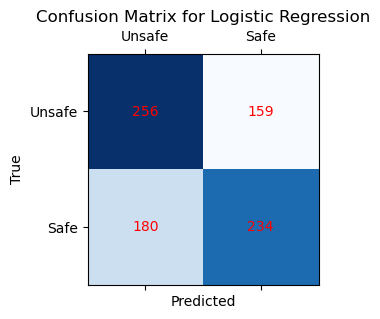

In [56]:
# Define class labels
class_labels = ['Unsafe', 'Safe']

# Training the Logistic Regression Classifier
lr_classifier_energy = LogisticRegression(random_state=42)
lr_classifier_energy.fit(X_train_tfidf_energy, y_train_energy)
lr_predictions_energy = lr_classifier_energy.predict(X_test_tfidf_energy)
print("Logistic Regression Classification Report for Energy Data:")
print(classification_report(y_test_energy, lr_predictions_energy))
lr_cm_energy = confusion_matrix(y_test_energy, lr_predictions_energy)
plot_confusion_matrix(lr_cm_energy, 'Logistic Regression', class_labels)

#### NAIVE BAYES

Naive Bayes Classification Report for Energy Data:
              precision    recall  f1-score   support

           0       0.58      0.57      0.58       415
           1       0.58      0.58      0.58       414

    accuracy                           0.58       829
   macro avg       0.58      0.58      0.58       829
weighted avg       0.58      0.58      0.58       829

Naive Bayes Confusion Matrix for Energy Data:


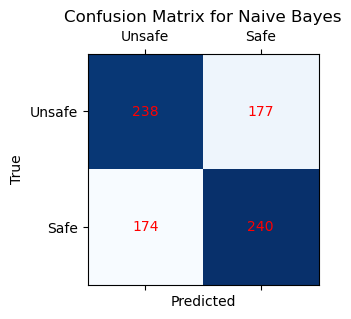

In [57]:
# Naive Bayes Training for Energy Data
nb_classifier_energy = MultinomialNB()
nb_classifier_energy.fit(X_train_tfidf_energy, y_train_energy)

# NB Evaluation for Energy Data
nb_predictions_energy = nb_classifier_energy.predict(X_test_tfidf_energy)
print("Naive Bayes Classification Report for Energy Data:")
print(classification_report(y_test_energy, nb_predictions_energy))

# Confusion Matrix for Energy Data
nb_cm_energy = confusion_matrix(y_test_energy, nb_predictions_energy)
print("Naive Bayes Confusion Matrix for Energy Data:")
plot_confusion_matrix(nb_cm_energy, 'Naive Bayes', class_labels)

#### SUPPORT VECTOR MACHINE

Support Vector Machine Classification Report for Energy Data:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       415
           1       0.59      0.57      0.58       414

    accuracy                           0.59       829
   macro avg       0.59      0.59      0.58       829
weighted avg       0.59      0.59      0.58       829

Support Vector Machine Confusion Matrix for Energy Data:


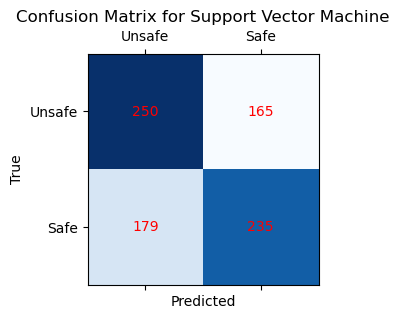

In [58]:
# Support Vector Machine Training for Energy Data
svm_classifier_energy = SVC(kernel='linear', random_state=42)
svm_classifier_energy.fit(X_train_tfidf_energy, y_train_energy)

# SVM Evaluation for Energy Data
svm_predictions_energy = svm_classifier_energy.predict(X_test_tfidf_energy)
print("Support Vector Machine Classification Report for Energy Data:")
print(classification_report(y_test_energy, svm_predictions_energy))

# Confusion Matrix for Energy Data
svm_cm_energy = confusion_matrix(y_test_energy, svm_predictions_energy)
print("Support Vector Machine Confusion Matrix for Energy Data:")
plot_confusion_matrix(svm_cm_energy, 'Support Vector Machine', class_labels)

## MENTAL HEALTH

In [59]:
# Initializing lists to store statements and their labels
all_statements_mental = []
all_labels_mental = []

# Iterating through each row of the dataset
for index, row in filtered_dataset.iterrows():
    # Checking if the cluster_macro_expert category for the row is CRAVING_HABIT
    if row['cluster_expert_merged'] == 'MENTAL_HEALTH':
       #passing statements
        for candidates_key, annotation_key in [('reflection_candidates', 'reflection_annotation'), 
                                               ('reframing_candidates', 'reframing_annotation'),
                                               ('comfort_candidates', 'comfort_annotation'),
                                                ('suggestion_candidates', 'suggestion_annotation')]:
            # Adjusting data structure
            for statement, annotation in zip(row[candidates_key], row[annotation_key]):
                all_statements_mental.append(statement)
                all_labels_mental.append(1 if annotation == 'Y' else 0)

In [60]:
# Creating a DataFrame from all collected statements and their labels
all_statements_mental_df = pd.DataFrame({
    'Statement': all_statements_mental,
    'Label': all_labels_mental
})

# Converting numeric labels back to 'Y' and 'N' for clarity
all_statements_mental_df['Label'] = all_statements_mental_df['Label'].apply(lambda x: 'Y' if x == 1 else 'N')

# Counting the number of statements in each category
category_counts = all_statements_mental_df['Label'].value_counts()
print("Number of statements in each category:")
print(category_counts)

# Printing two samples for each category
print("\nTwo samples for each category:")

for label in all_statements_mental_df['Label'].unique():
    print(f"\nCategory {label} samples:")
    samples = all_statements_mental_df[all_statements_mental_df['Label'] == label].sample(n=2, random_state=1)
    for i, row in samples.iterrows():
        print(f"- {row['Statement']}")

Number of statements in each category:
Label
Y    3200
N     840
Name: count, dtype: int64

Two samples for each category:

Category Y samples:
- Are you saying that your fear of being judged is preventing you from going to the gym to work out?
- Starting from tomorrow you could try to shift your focus away from your friends' bodies and instead focus on your own health and well-being.

Category N samples:
- It can happen to anyone, to feel self-conscious or judged by others when working out. 
- Starting from tomorrow, you could remind yourself that it's normal to have setbacks and that it's important to be kind to yourself during these times.


### HANDLING CLASS IMBALANCE

In [61]:
# Creating a DataFrame from the lists
mental_data = pd.DataFrame({
    'Statement': all_statements_mental,
    'Label': all_labels_mental
})

# Displaying the initial distribution of labels
print("Initial distribution of mental health labels:")
print(mental_data['Label'].value_counts())

# Setting up the Random UnderSampler
rus = RandomUnderSampler(random_state=42)

# Resampling the mental health data
X_resampled_mental, y_resampled_mental = rus.fit_resample(mental_data[['Statement']], mental_data['Label'])

# Converting the resampled features back to a DataFrame
resampled_mental_data = pd.DataFrame(X_resampled_mental, columns=['Statement'])
resampled_mental_data['Label'] = y_resampled_mental

# Displaying the new distribution of labels
print("New distribution of mental health labels after undersampling:")
print(resampled_mental_data['Label'].value_counts())

Initial distribution of mental health labels:
Label
1    3200
0     840
Name: count, dtype: int64
New distribution of mental health labels after undersampling:
Label
0    840
1    840
Name: count, dtype: int64


### TRAIN/TEST SPLIT (80/20)

In [62]:
# Splitting data into training and test sets with stratification
X_train_mental, X_test_mental, y_train_mental, y_test_mental = train_test_split(
    resampled_mental_data['Statement'], 
    resampled_mental_data['Label'], 
    test_size=0.20, 
    random_state=42,
    stratify=resampled_mental_data['Label']  # Ensures the class distribution is maintained
)

### VECTORIZING THE DATA

In [63]:
# Initializing the TfidfVectorizer with English stop words for the mental health data
vectorizer_mental = TfidfVectorizer(stop_words='english')
X_train_tfidf_mental = vectorizer_mental.fit_transform(X_train_mental)
X_test_tfidf_mental = vectorizer_mental.transform(X_test_mental)

### TRAINING AND EVALUATING THE MODEL

#### LOGISTIC REGRESSION

Logistic Regression Classification Report for Mental Health Data:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       168
           1       0.60      0.66      0.63       168

    accuracy                           0.61       336
   macro avg       0.61      0.61      0.61       336
weighted avg       0.61      0.61      0.61       336



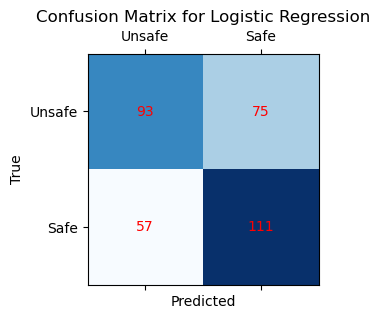

In [64]:
# Logistic Regression for Mental Health Data
lr_classifier_mental = LogisticRegression(random_state=42)
lr_classifier_mental.fit(X_train_tfidf_mental, y_train_mental)
#LR Evaluation
lr_predictions_mental = lr_classifier_mental.predict(X_test_tfidf_mental)
print("Logistic Regression Classification Report for Mental Health Data:")
print(classification_report(y_test_mental, lr_predictions_mental))
lr_cm_mental = confusion_matrix(y_test_mental, lr_predictions_mental)
plot_confusion_matrix(lr_cm_mental, 'Logistic Regression', class_labels)

#### NAIVE BAYES

Naive Bayes Classification Report for Mental Health Data:
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       168
           1       0.62      0.65      0.64       168

    accuracy                           0.63       336
   macro avg       0.63      0.63      0.63       336
weighted avg       0.63      0.63      0.63       336



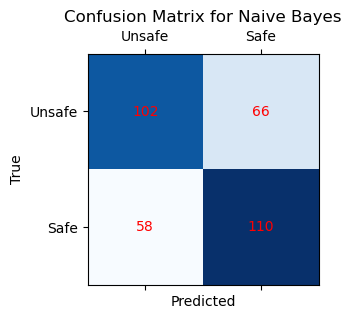

In [65]:
# Naive Bayes for Mental Health Data
nb_classifier_mental = MultinomialNB()
nb_classifier_mental.fit(X_train_tfidf_mental, y_train_mental)
nb_predictions_mental = nb_classifier_mental.predict(X_test_tfidf_mental)
#SVM Evaluation
print("Naive Bayes Classification Report for Mental Health Data:")
print(classification_report(y_test_mental, nb_predictions_mental))
nb_cm_mental = confusion_matrix(y_test_mental, nb_predictions_mental)
plot_confusion_matrix(nb_cm_mental, 'Naive Bayes', class_labels)

#### SUPPORT VECTOR MACHINE

Support Vector Machine Classification Report for Mental Health Data:
              precision    recall  f1-score   support

           0       0.63      0.58      0.61       168
           1       0.61      0.66      0.64       168

    accuracy                           0.62       336
   macro avg       0.62      0.62      0.62       336
weighted avg       0.62      0.62      0.62       336

Support Vector Machine Confusion Matrix for Mental Health Data:


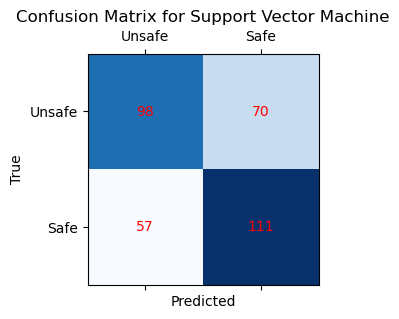

In [66]:
# SVM for Mental Health Data
svm_classifier_mental = SVC(kernel='linear', random_state=42)
svm_classifier_mental.fit(X_train_tfidf_mental, y_train_mental)
svm_predictions_mental = svm_classifier_mental.predict(X_test_tfidf_mental)
print("Support Vector Machine Classification Report for Mental Health Data:")
print(classification_report(y_test_mental, svm_predictions_mental))

# Confusion Matrix for Mental Health Data
svm_cm_mental = confusion_matrix(y_test_mental, svm_predictions_mental)
print("Support Vector Machine Confusion Matrix for Mental Health Data:")
plot_confusion_matrix(svm_cm_mental, 'Support Vector Machine', class_labels)